# XGBoost Classification
### Over a period of nine years in deep space, the NASA Kepler space telescope has been out on a planet-hunting mission to discover hidden planets outside of our solar system.

## Classifying Candidate Exoplanets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data file
data_df = pd.read_csv("cumulative.csv")
data_df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
# Extract the list of all columns
column_list = data_df.columns.tolist()
print(column_list)

['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']


In [4]:
# Start to collect all columns we may not need.
drop_cols = ['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_tce_plnt_num', 'koi_tce_delivname']

# let's also drop all columns related to errors.
for column in column_list:
    if "err" in column:
        drop_cols.append(column)

print(drop_cols)

['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2']


In [5]:
the_data = data_df.drop(drop_cols, axis = 1)
the_data.head()

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,...,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,...,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,...,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,0.000,0,1,0,0,19.899140,175.850252,0.969,1.78220,...,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,...,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,...,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [6]:
# Only the keep the data for  CONFIRMED and FALSE POSITIVE.
exoplanet_df = the_data[the_data["koi_disposition"] != "CANDIDATE"]
exoplanet_df.head()

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,...,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,...,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,...,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,0.000,0,1,0,0,19.899140,175.850252,0.969,1.78220,...,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,...,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,...,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [7]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7316 entries, 0 to 9563
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_disposition  7316 non-null   object 
 1   koi_score        6257 non-null   float64
 2   koi_fpflag_nt    7316 non-null   int64  
 3   koi_fpflag_ss    7316 non-null   int64  
 4   koi_fpflag_co    7316 non-null   int64  
 5   koi_fpflag_ec    7316 non-null   int64  
 6   koi_period       7316 non-null   float64
 7   koi_time0bk      7316 non-null   float64
 8   koi_impact       7016 non-null   float64
 9   koi_duration     7316 non-null   float64
 10  koi_depth        7016 non-null   float64
 11  koi_prad         7016 non-null   float64
 12  koi_teq          7016 non-null   float64
 13  koi_insol        7057 non-null   float64
 14  koi_model_snr    7016 non-null   float64
 15  koi_steff        7016 non-null   float64
 16  koi_slogg        7016 non-null   float64
 17  koi_srad      

In [8]:
# Missing data detection.
import missingno as msno

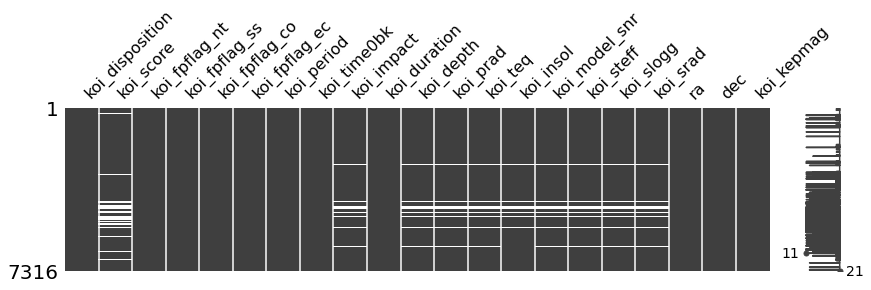

In [9]:
msno.matrix(exoplanet_df,figsize=(14,3));

In [10]:
# Drop rows with empty values.
model_df = exoplanet_df.copy()
model_df.dropna(axis = 0, inplace=True)
model_df.head()

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,...,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,...,2.26,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,...,2.83,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,0.000,0,1,0,0,19.899140,175.850252,0.969,1.78220,...,14.60,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,...,33.46,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,...,2.75,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509


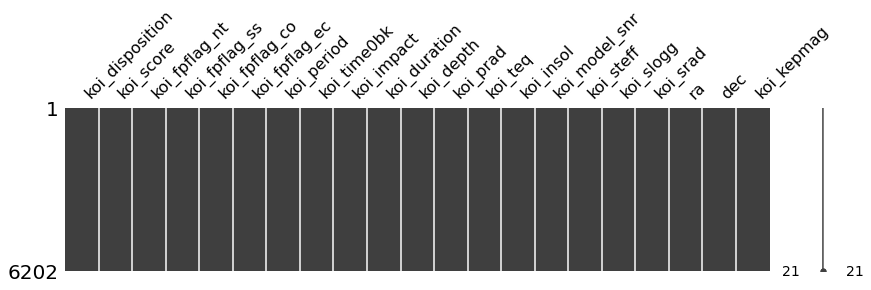

In [11]:
msno.matrix(model_df,figsize=(14,3));

In [12]:
# Check for possible class imbalance.
model_df["koi_disposition"].value_counts()

FALSE POSITIVE    3921
CONFIRMED         2281
Name: koi_disposition, dtype: int64

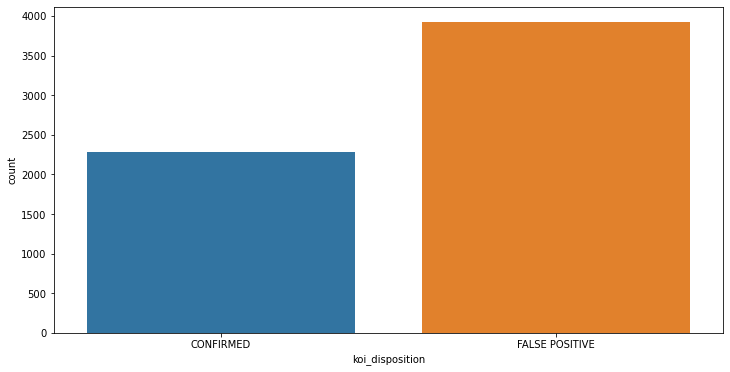

In [13]:
# Plot the graph below
plt.figure(figsize=(12,6))

sns.countplot(x="koi_disposition" ,data=model_df);

In [14]:
# Convert koi_disposition (target variable) into a dummy variable
model_dummy_df = pd.get_dummies(model_df,columns = ['koi_disposition'],drop_first=True)
model_dummy_df.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,koi_disposition_FALSE POSITIVE
0,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,...,793.0,93.59,35.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,0
1,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443.0,9.11,25.8,5455.0,4.467,0.927,291.93423,48.141651,15.347,0
2,0.000,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638.0,39.30,76.3,5853.0,4.544,0.868,297.00482,48.134129,15.436,1
3,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395.0,891.96,505.6,5805.0,4.564,0.791,285.53461,48.285210,15.597,1
4,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406.0,926.16,40.9,6031.0,4.438,1.046,288.75488,48.226200,15.509,0


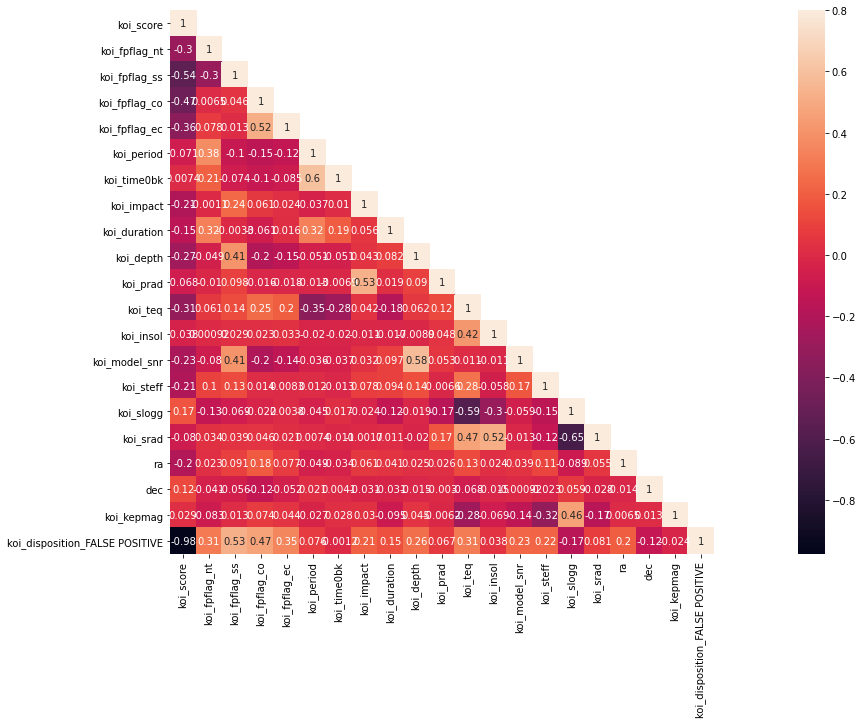

In [15]:
# Correlation analasys
corrMatt = model_dummy_df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

## Data Preprocessing

In [16]:
# Create the X variable
X = model_dummy_df.drop(["koi_disposition_FALSE POSITIVE"],axis=1)

In [17]:
# Create the y variable
y = model_dummy_df["koi_disposition_FALSE POSITIVE"]

In [18]:
# Now split the data into a training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Build and train the Model

In [21]:
# Import XGBClassifier
from xgboost import XGBClassifier

In [22]:
# Create an instance of XGBClassifier
model = XGBClassifier()

In [23]:
# Fit the data to the training set
model.fit(X_train_scaled,y_train)    

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
# Now lets make predctions
predictions = model.predict(X_test_scaled)

In [25]:
# Import the classification metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [26]:
# Check the model's accuracy
accuracy_score(predictions, y_test)

0.9914024717893606

In [27]:
# Print the confusion Matrix
confusion_matrix(predictions, y_test)

array([[ 704,    3],
       [  13, 1141]], dtype=int64)

In [28]:
# Plot the confussion matrix
from sklearn.metrics import plot_confusion_matrix

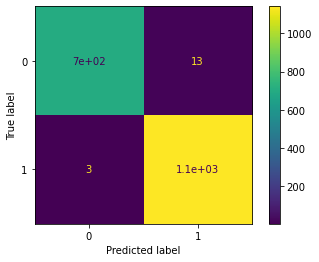

In [29]:
plot_confusion_matrix(model,X_test_scaled,y_test)

In [30]:
# Print the classification report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       707
           1       1.00      0.99      0.99      1154

    accuracy                           0.99      1861
   macro avg       0.99      0.99      0.99      1861
weighted avg       0.99      0.99      0.99      1861



In [31]:
# Save the model to file using pickle
import pickle

pickle.dump(model, open("xgboost_model_trained.pickle.dat", "wb"))

In [32]:
# load model from file
#loaded_model = pickle.load(open("xgboost_model_trained.pickle.dat", "rb"))